https://twitter.com/dannchu/status/1563401132902588417

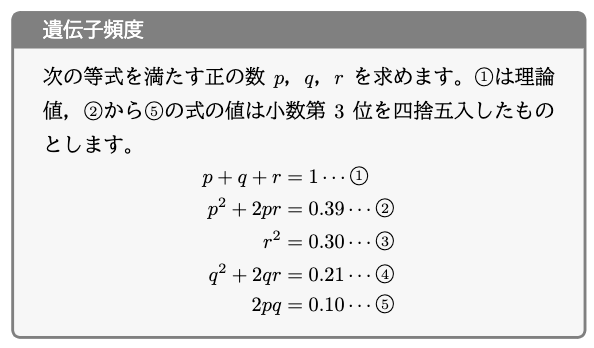

In [1]:
using Optim

function F(x; w = (0.39, 0.30, 0.21, 0.10))
    p, q, r = x
    a, b, c, d = w
    (p + q + r - 1)^2 + (p^2 + 2p*r - a)^2 + (r^2 - b)^2 + (q^2 + 2q*r - c)^2 + (2p*q - d)^2
end

o = optimize(F, fill(1/3, 3), LBFGS())

 * Status: success

 * Candidate solution
    Final objective value:     2.829940e-05

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.71e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.12e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.56e-13 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.51e-09 ≰ 0.0e+00
    |g(x)|                 = 9.75e-10 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    8
    f(x) calls:    20
    ∇f(x) calls:   20


In [2]:
o.minimizer

3-element Vector{Float64}:
 0.2839852252443264
 0.1681895702410221
 0.5470635714575498

In [3]:
sum(o.minimizer)

0.9992383669428984

In [4]:
using Optim

function G(x; w = (0.39, 0.30, 0.21, 0.10))
    p, q  = x
    r = 1 - p - q
    a, b, c, d = w
    (p^2 + 2p*r - a)^2 + (r^2 - b)^2 + (q^2 + 2q*r - c)^2 + (2p*q - d)^2
end

o = optimize(G, fill(1/3, 2), LBFGS())

 * Status: success

 * Candidate solution
    Final objective value:     2.950930e-05

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 2.44e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 8.60e-06 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.50e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.47e-07 ≰ 0.0e+00
    |g(x)|                 = 1.26e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    6
    f(x) calls:    14
    ∇f(x) calls:   14


In [5]:
sol = [o.minimizer; 1 - sum(o.minimizer)]

3-element Vector{Float64}:
 0.2841456385892286
 0.16845702633351833
 0.5473973350772531

minimum(o) = 2.9509303240561715e-5
sol = [0.2841456385892286, 0.16845702633351833, 0.5473973350772531]


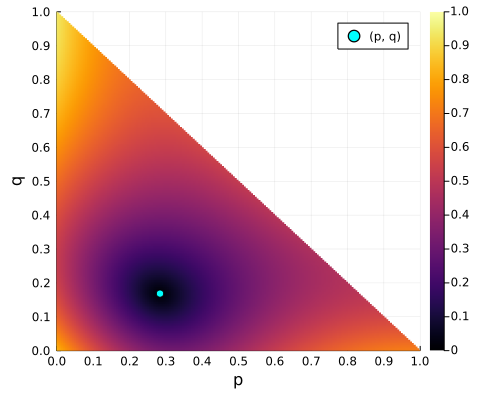

In [6]:
using Optim
using Plots

function G(x; w = (0.39, 0.30, 0.21, 0.10))
    p, q  = x
    r = 1 - p - q
    a, b, c, d = w
    (p^2 + 2p*r - a)^2 + (r^2 - b)^2 + (q^2 + 2q*r - c)^2 + (2p*q - d)^2
end
o = optimize(G, fill(1/3, 2), LBFGS())
@show minimum(o)
sol = [o.minimizer; 1 - sum(o.minimizer)]
@show sol

p = range(0, 1, 200)
q = range(0, 1, 200)
heatmap(p, q, (p, q) -> p + q ≤ 1 ? √G((p, q)) : NaN; clim=(0, 1))
scatter!([sol[1]], [sol[2]]; label="(p, q)", c=:cyan)
plot!(xlim=(0, 1), ylim=(0, 1), xtick=0:0.1:1, ytick=0:0.1:1)
plot!(xguide="p", yguide="q", size=(480, 400))

In [7]:
using Optim

function H(x; w = (0.39, 0.30))
    p, q, c, d  = x
    r = 1 - p - q
    a, b = w
    (p^2 + 2p*r - a)^2 + (r^2 - b)^2 + (q^2 + 2q*r - c)^2 + (2p*q - d)^2
end
o = optimize(H, fill(1/4, 4), LBFGS())
@show minimum(o)
@show o.minimizer;

minimum(o) = 1.0951501339978823e-20
o.minimizer = [0.28293982880757296, 0.16933761377641857, 0.21417528917456413, 0.09582471091122896]
